📁 Please upload your cleaned dataset (heart_cleaned.csv)...


Saving heart_cleaned.csv to heart_cleaned.csv
✅ Dataset Loaded Successfully!
Shape: (302, 14)
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  3.0     145.0  233.0  0.0      0.0    150.0    0.0      2.3   
1  37.0  1.0  2.0     130.0  250.0  0.0      1.0    187.0    0.0      3.5   
2  41.0  0.0  1.0     130.0  204.0  0.0      0.0    172.0    0.0      1.4   
3  56.0  1.0  1.0     120.0  236.0  0.0      1.0    178.0    0.0      0.8   
4  57.0  0.0  0.0     120.0  354.0  0.0      1.0    163.0    1.0      0.6   

   slope   ca  thal  target  
0    0.0  0.0   1.0     1.0  
1    0.0  0.0   2.0     1.0  
2    2.0  0.0   2.0     1.0  
3    2.0  0.0   2.0     1.0  
4    2.0  0.0   2.0     1.0  

📊 Train/Test Split:
Training Samples: 241
Testing Samples: 61

✅ Logistic Regression Results:
Accuracy: 0.8525
Confusion Matrix:
 [[24  5]
 [ 4 28]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.83 

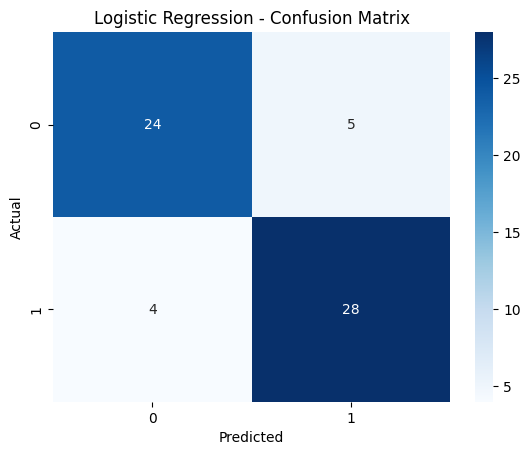


✅ Random Forest Results:
Accuracy: 0.8689
Confusion Matrix:
 [[26  3]
 [ 5 27]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87        29
         1.0       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



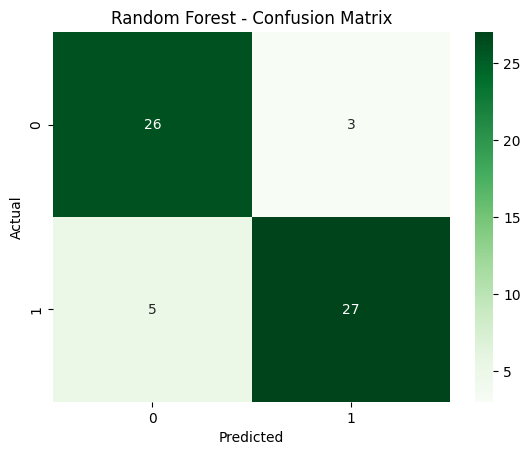

/tmp/ipython-input-1470970559.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results, palette='pastel')


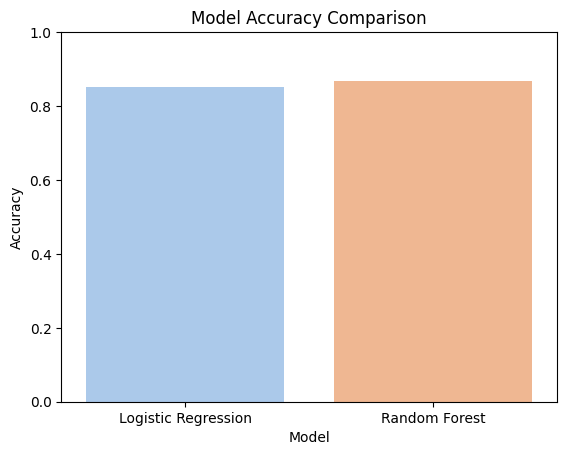


📈 Model Comparison:
                 Model  Accuracy
0  Logistic Regression  0.852459
1        Random Forest  0.868852

📄 Summary Report:
✅ Random Forest performed better (0.87) than Logistic Regression (0.85).

📘 Milestone: Baseline classification models successfully built and evaluated.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
print("📁 Please upload your cleaned dataset (heart_cleaned.csv)...")
uploaded = files.upload()
df = pd.read_csv("heart_cleaned.csv")
print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
print(df.head())
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("\n📊 Train/Test Split:")
print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred_log)
print("\n✅ Logistic Regression Results:")
print(f"Accuracy: {log_accuracy:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("\n✅ Random Forest Results:")
print(f"Accuracy: {rf_accuracy:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [log_accuracy, rf_accuracy]
})
sns.barplot(x='Model', y='Accuracy', data=results, palette='pastel')
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()
print("\n📈 Model Comparison:")
print(results)
print("\n📄 Summary Report:")
if rf_accuracy > log_accuracy:
    print(f"✅ Random Forest performed better ({rf_accuracy:.2f}) than Logistic Regression ({log_accuracy:.2f}).")
else:
    print(f"✅ Logistic Regression performed better ({log_accuracy:.2f}) than Random Forest ({rf_accuracy:.2f}).")
print("\n📘 Milestone: Baseline classification models successfully built and evaluated.")
